In [43]:
!pwd

/Users/guillemcomerma/Developer/nma/nma_cn_project/notebooks


## Step 1: Set up your environment

In [44]:
!pip install -r "../requirements.txt"


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## Step 2: Install and import relevant libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from one.api import ONE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 3: Read and load the data

In [2]:
# Configure ONE api
ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')

In [3]:
# Initiliaze ONE api
one = ONE()

In [ ]:
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'
trials = one.search(eid, 'trials', collection='alf')

In [4]:
# Load a session
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'
trials = one.load_object(eid, 'trials', collection='alf')

# Convert to DataFrame
df = trials.to_df()
# Check df
print(df.shape)
df.head()

(529, 15)


,goCueTrigger_times,stimOff_times,probabilityLeft,feedbackType,response_times,choice,firstMovement_times,contrastLeft,contrastRight,stimOn_times,rewardVolume,feedback_times,goCue_times,intervals_0,intervals_1
0,270.226443,271.808250,0.5,1.0,270.752246,-1.0,270.444497,NaN,1.000,270.226308,1.5,270.752355,270.227241,266.151016,272.308260
1,274.942783,276.558275,0.5,1.0,275.497289,1.0,274.973497,0.25,NaN,274.942670,1.5,275.497414,274.943536,272.713159,277.058308
2,278.059316,279.375926,0.5,1.0,278.324819,-1.0,278.054497,NaN,0.250,278.059191,1.5,278.324931,278.060158,277.530011,279.876038
3,280.724943,283.442886,0.5,1.0,282.377753,-1.0,282.163497,NaN,0.125,280.724791,1.5,282.377859,280.725791,280.244039,283.942967
4,284.874769,286.591271,0.5,1.0,285.528572,-1.0,285.031497,NaN,0.250,284.874610,1.5,285.528678,284.875743,284.311066,287.091282


## Step 4: Perform exploratory data analysis

In [5]:
# Check contrast columns
contrast_columns = df[['contrastLeft', 'contrastRight']]
contrast_columns

,contrastLeft,contrastRight
0,NaN,1.000
1,0.2500,NaN
2,NaN,0.250
3,NaN,0.125
4,NaN,0.250
...,...,...
524,0.0625,NaN
525,0.0000,NaN
526,1.0000,NaN
527,NaN,1.000


In [6]:
# Check how many times both columns are NaN
both_nan_count = contrast_columns.isna().all(axis=1).sum()
both_nan_count

0

In [7]:
# select constrastLeft and if not contrastRight
df['contrast'] = df['contrastLeft'].fillna(df['contrastRight'])
df['contrast'].value_counts()

contrast
0.1250    127
1.0000    117
0.0625    116
0.2500    110
0.0000     59
Name: count, dtype: int64

In [8]:
# check target label (feedbackType)
df['feedbackType'].value_counts()

feedbackType
 1.0    443
-1.0     86
Name: count, dtype: int64

### Correlation heatmaps

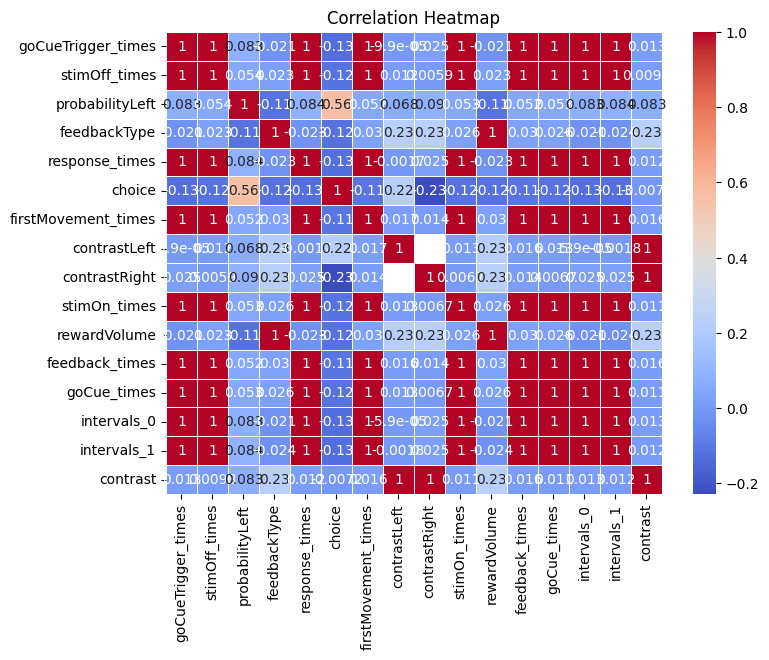

In [9]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

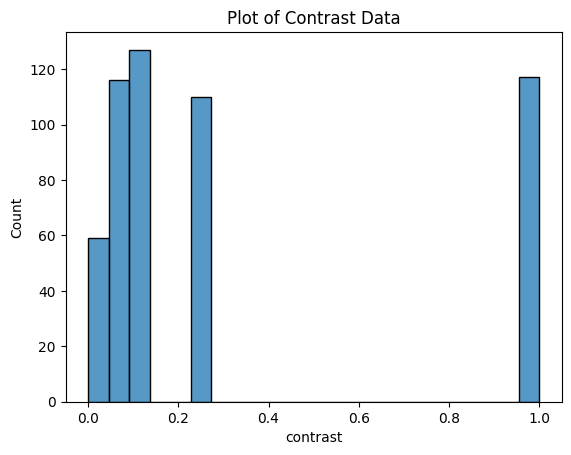

In [10]:
# input variables distribution
# contrast
# Histogram Plot for Gaussian
# KDE represents the data using a continuous probability density curve
sns.histplot(df['contrast'], kde=False)
plt.title("Plot of Contrast Data")
plt.show()

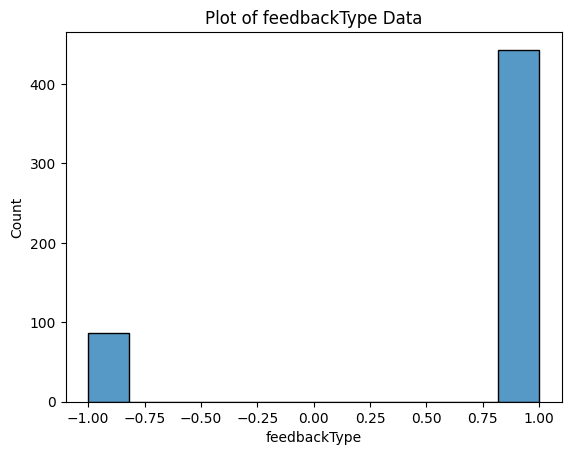

In [11]:
# output variables distribution
# Histogram Plot for feedback/target
sns.histplot(df['feedbackType'], kde=False)
plt.title("Plot of feedbackType Data")
plt.show()

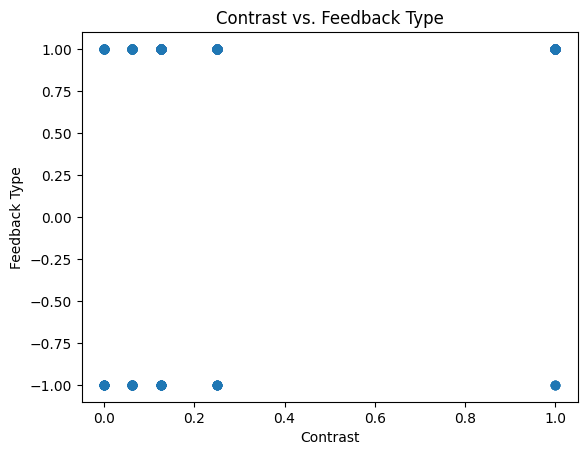

In [12]:
# Plot contrast vs target variable
# Plot contrast vs. feedbackType
plt.scatter(df['contrast'], df['feedbackType'])
plt.xlabel('Contrast')
plt.ylabel('Feedback Type')
plt.title('Contrast vs. Feedback Type')
plt.show()

In [13]:
# Check the shape of both input and ouput/target
print(df['contrast'].shape)
print(df['feedbackType'].shape)

(529,)
(529,)


In [14]:
# Train model
# Split the data into training and test sets
X = df[['contrast']] # 0 nan so no need to .fillna(0)
y = df['feedbackType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        27
         1.0       0.83      1.00      0.91       132

    accuracy                           0.83       159
   macro avg       0.42      0.50      0.45       159
weighted avg       0.69      0.83      0.75       159

[[  0  27]
 [  0 132]]


/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/guillemcomerma/Developer/nma/nma_cn_project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Accuracy: 0.83


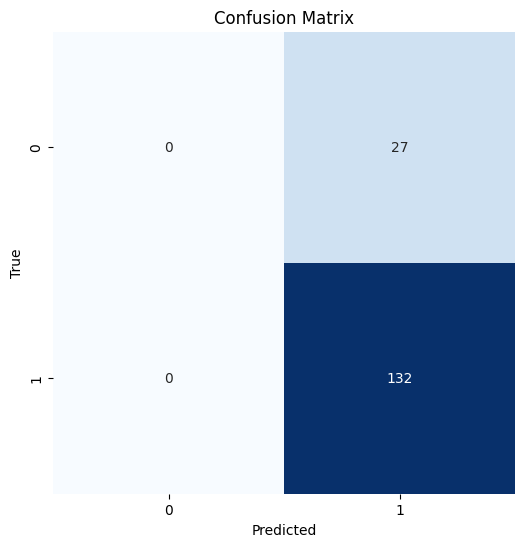

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

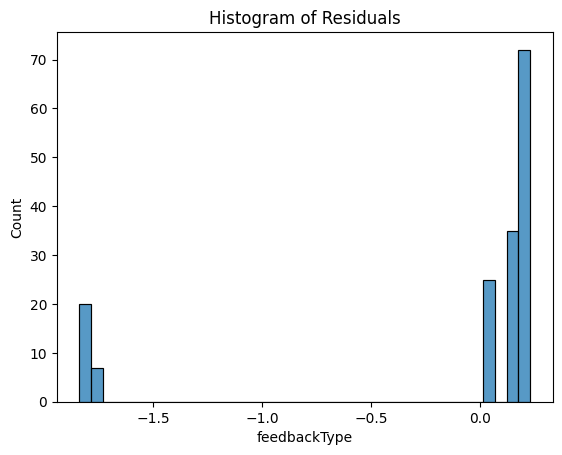

In [17]:
# Histogram of Residuals
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate residuals
residuals = y_test - y_pred_prob
sns.histplot(residuals, kde=False)
plt.title("Histogram of Residuals")
plt.show()

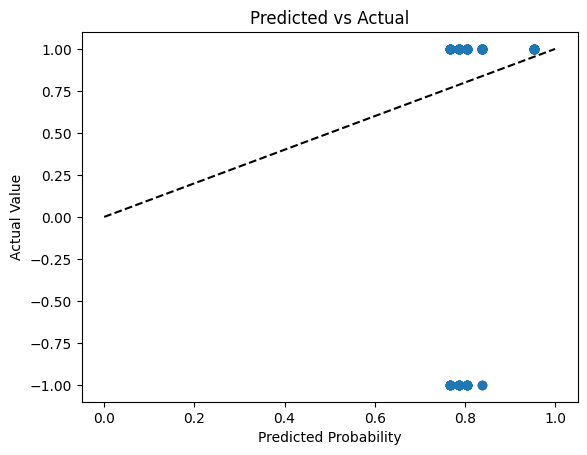

In [18]:
# Check model assumptions
# 1 linearity
# Checks if the relationship between the input variables and the log odds of the outcome is linear.
# By plotting predicted probabilities against actual values and comparing to a diagonal line. 
# Ideally, points should lie close to this diagonal line, indicating linearity.
y_pred_prob = model.predict_proba(X_test)[:, 1]
plt.scatter(y_pred_prob, y_test)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Value')
plt.title('Predicted vs Actual')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
# If points lie close to the diagonal line, the assumption of linearity holds.
# If points deviate significantly, 
# the linearity assumption is violated, suggesting that a non-linear model might be more appropriate.


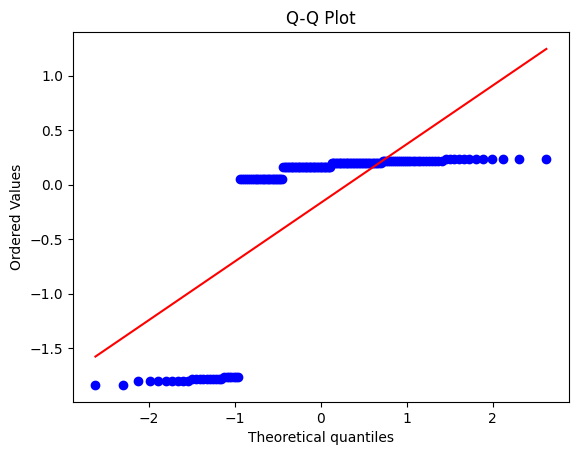

In [19]:
# NORMALITY CHECK
# Checks if the residuals (differences between observed and predicted values) are normally distributed.
# By using a Q-Q (Quantile-Quantile) plot, which compares the distribution of residuals to a normal distribution.

# Calculate residuals
residuals = y_test - y_pred_prob

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
# If residuals lie along the reference line, they are normally distributed.
# If residuals deviate from the line, normality is violated, indicating potential model misspecification or non-normal errors.


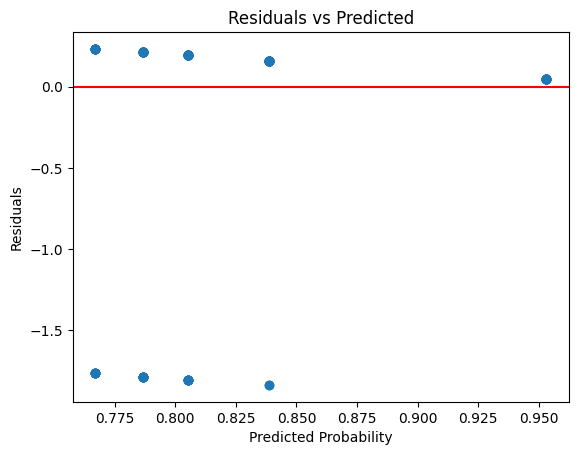

In [20]:
# Homoskedasticity
# Plot residuals vs predicted values.
# Checks if the residuals have constant variance across all levels of the independent variable.
plt.scatter(y_pred_prob, residuals)
plt.xlabel('Predicted Probability')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [21]:
# Inclue more features
# Split the data into training and test sets
X = df[['contrast', 'rewardVolume']]  # Add more features as needed
y = df['feedbackType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        27
         1.0       1.00      1.00      1.00       132

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

[[ 27   0]
 [  0 132]]


Accuracy: 1.00


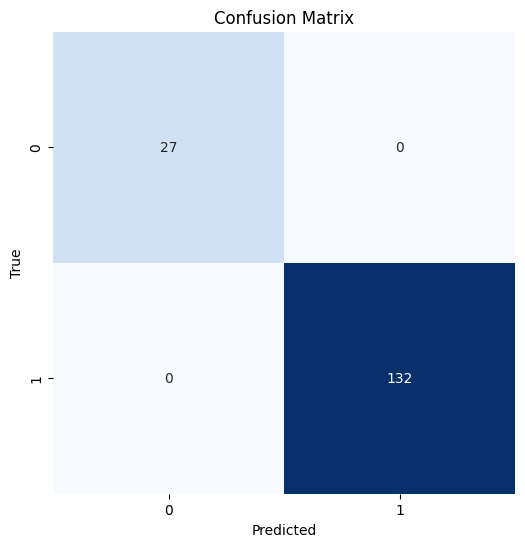

In [22]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()